**Write a TensorFlow program to create a multi class image classifier for the given data. ** 

**Use Keras API to create the multilayer neural network model.**  

**Try out various configurations for the model and number of epochs for training and submit the code with the best possible accuracy.**  

 

**About the Data : The data used is publicly available on Kaggle and can be downloaded here.**  

**Data Resource Link : https://www.kaggle.com/smeschke/four-shapes** 

**Data_4Class.zip  Data set:** 

- Square – 3000,100 (train, test) 
- Rectangle-3000,100 (train, test) 
- Triangle-3000,100 (train, test) 
- Star- 3000,100 (train, test) 
- Street- 3000,100 (train, test) 

- **Total No. of  images - 12400**

In [1]:
import os

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16

In [4]:
tf.__version__

'2.6.0'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rotation_range=30, shear_range=0.2, width_shift_range=2, zoom_range=0.3, 
                            vertical_flip=True, rescale=1./255)

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
!ls Data_4Class

inference test      train


In [9]:
DATA_DIR = 'Data_4Class'
IMG_TARGET_SIZE = (64, 64)
BATCH_SIZE = 34
CASS_MODE = 'sparse'
NUMBER_OF_CLASSES = 4

INPUT_SHAPE = list(IMG_TARGET_SIZE)
INPUT_SHAPE.append(3)
INPUT_SHAPE = tuple(INPUT_SHAPE)

ACTIVATION = 'softmax'

In [10]:
INFERENCE_DIR = os.path.join(DATA_DIR, "inference")

In [11]:
INFERENCE_IMAGES = ['732', '3709', '3710', '3711', '3718', '3719', '3764']
EXT = '.png'

In [12]:
INFERENCE_IMG_PATH = list([])
index = 0
for i in INFERENCE_IMAGES:
    INFERENCE_IMG_PATH.append(os.path.join(INFERENCE_DIR, INFERENCE_IMAGES[index]+EXT))
    index = index+1

In [13]:
train_generator = train_datagen.flow_from_directory(
        os.path.join(DATA_DIR, "train"),
        target_size=IMG_TARGET_SIZE,
        batch_size=BATCH_SIZE,
        class_mode=CASS_MODE)

validation_generator = test_datagen.flow_from_directory(
        os.path.join(DATA_DIR, "test"),
        target_size=IMG_TARGET_SIZE,
        batch_size=BATCH_SIZE,
        class_mode=CASS_MODE)

Found 12000 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


Show the first nine images and labels from the training set:

In [14]:
train_generator.class_indices

{'circle': 0, 'square': 1, 'star': 2, 'triangle': 3}

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,Conv2D,MaxPooling2D

In [16]:
## Initialising the CNN
classifier = Sequential()

2022-01-27 21:44:36.559183: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
base_model = VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=INPUT_SHAPE,
    pooling=None,
    classes=NUMBER_OF_CLASSES,
    classifier_activation="relu",
)

In [18]:
base_model.trainable = False

In [19]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [20]:
classifier = Sequential(
    base_model
)

classifier.add(Flatten())
classifier.add(Dense(NUMBER_OF_CLASSES, activation = ACTIVATION))

In [21]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 8196      
Total params: 14,722,884
Trainable params: 8,196
Non-trainable params: 14,714,688
_________________________________________________________________


In [22]:
train_generator.class_indices

{'circle': 0, 'square': 1, 'star': 2, 'triangle': 3}

In [23]:
base_learning_rate = 0.0001

In [24]:
import math

In [25]:
classifier.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'])

In [26]:
def scheduler(epoch, lr):
    if epoch < 3:
        return lr
    else:
        return lr * math.exp(-0.1)

In [27]:
EPOCHS = 5

In [28]:
## fitting model to images
history = classifier.fit(train_generator,epochs=EPOCHS,validation_data=validation_generator, 
               callbacks=[tf.keras.callbacks.LearningRateScheduler(scheduler)])

2022-01-27 21:44:38.670444: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
353/353 [==============================] - 318s 897ms/step - loss: 0.4585 - accuracy: 0.9317 - val_loss: 0.1092 - val_accuracy: 1.0000
Epoch 2/5
353/353 [==============================] - 299s 848ms/step - loss: 0.0813 - accuracy: 1.0000 - val_loss: 0.0366 - val_accuracy: 1.0000
Epoch 3/5
353/353 [==============================] - 299s 847ms/step - loss: 0.0381 - accuracy: 1.0000 - val_loss: 0.0197 - val_accuracy: 1.0000
Epoch 4/5
353/353 [==============================] - 304s 862ms/step - loss: 0.0227 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 5/5
353/353 [==============================] - 25266s 72s/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

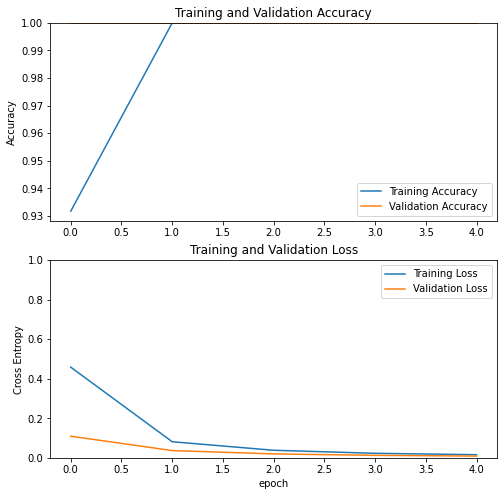

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [30]:
from tensorflow.keras.preprocessing import image

In [31]:
def infer_prediction(index):
    test_image_orig = image.load_img(INFERENCE_IMG_PATH[index] ,target_size = IMG_TARGET_SIZE)
    ## Convert image to array
    test_image = image.img_to_array(test_image_orig)
    
## For single prediction change the dimension . 
    test_image=test_image.reshape(1,64,64,3)
    result = classifier.predict(test_image)
    result=np.around(result)
    result=result.argmax()
    
    key_list = list(train_generator.class_indices.keys())
    val_list = list(train_generator.class_indices.values())

    position = val_list.index(result)
    
    fig, ax = plt.subplots(figsize=(2,1))
    ax.imshow(test_image_orig)
    ax.set_title(key_list[position])
    ax.axis(False)
    return key_list[position]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

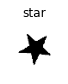

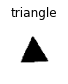

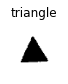

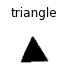

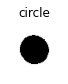

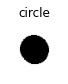

In [32]:
for i in range(6):
    infer_prediction(i)